In [97]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import joblib

iris = datasets.load_iris()

print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [98]:
df = pd.DataFrame({
    'sepal length': iris.data[:, 0],
    'sepal width': iris.data[:, 1],
    'petal length': iris.data[:, 2],
    'petal width': iris.data[:, 3],
    'species': iris.target
})

df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [99]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

X = df[features]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rfc = RandomForestClassifier(n_estimators=100)

model = rfc.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

array([1, 1, 0, 1, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0,
       0, 1, 2, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 2, 0, 2, 1, 2, 0, 2, 1, 0,
       1])

In [100]:
print('Acurácia:', metrics.accuracy_score(y_test, predictions))

Acurácia: 0.9333333333333333


In [101]:
Xc = sm.add_constant(X)
print(sm.OLS(y, Xc).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                species   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     484.5
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           8.46e-83
Time:                        18:13:08   Log-Likelihood:                 17.437
No. Observations:                 150   AIC:                            -24.87
Df Residuals:                     145   BIC:                            -9.821
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1865      0.205      0.910   

In [102]:
model.feature_importances_

array([0.09845432, 0.02796104, 0.4460381 , 0.42754654])

In [103]:
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
feature_importance

petal length    0.446038
petal width     0.427547
sepal length    0.098454
sepal width     0.027961
dtype: float64

No handles with labels found to put in legend.


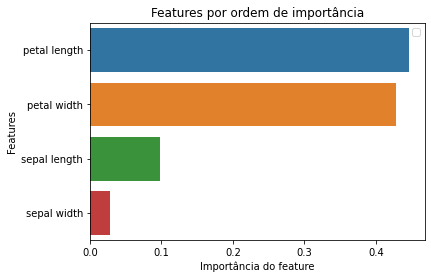

In [104]:
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Features por ordem de importância')
plt.xlabel('Importância do feature')
plt.ylabel('Features')
plt.legend()
plt.show()

In [105]:
def new_model(df, features, target):
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    rfc = RandomForestClassifier(n_estimators=100)
    model = rfc.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return {
        'model': model,
        'accuracy': metrics.accuracy_score(y_test, predictions),
    }

In [106]:
new_model(df, features, 'species')

{'model': RandomForestClassifier(), 'accuracy': 0.9777777777777777}

In [120]:
for i in range(5):
    print(new_model(df, features, 'species'))

{'model': RandomForestClassifier(), 'accuracy': 0.9111111111111111}
{'model': RandomForestClassifier(), 'accuracy': 0.9333333333333333}
{'model': RandomForestClassifier(), 'accuracy': 0.9333333333333333}
{'model': RandomForestClassifier(), 'accuracy': 0.9555555555555556}
{'model': RandomForestClassifier(), 'accuracy': 0.9333333333333333}


In [131]:
new_features = ['sepal length', 'petal length', 'petal width']
best_model = new_model(df, new_features, 'species')
best_model

{'model': RandomForestClassifier(), 'accuracy': 0.9777777777777777}

In [132]:
joblib.dump(best_model, 'melhor_modelo.model')

['melhor_modelo.model']

In [133]:
best_model = joblib.load('melhor_modelo.model')
best_model

{'model': RandomForestClassifier(), 'accuracy': 0.9777777777777777}

In [134]:
best_model['model'].predict([[5, 1.4, 0.2]])

array([0])